In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

"""
1. 사이킷런에 존재하는 데이터를 불러오고, 
   데이터와 변수 이름을 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 존재하는 boston 데이터를 
           (X, y)의 형태로 불러옵니다. 
   
   Step02. 데이터의 변수 이름을 feature_names 에 저장합니다.
   
   [실습6]에서 구현한 함수를 그대로 이용할 수 있습니다.
"""
def load_data():
    
    X, y  = fetch_openml(name = 'boston', version=1, return_X_y = True)
    X = X.astype(float)
    y = y.astype(float)    
    feature_names = X.columns
    
    
    return X, y , feature_names
 

ElasticNet 회귀의 평가 점수: 0.7529261038422

ElasticNet 회귀의 beta_i
 NOX       -12.156353
DIS        -1.458449
PTRATIO    -0.881076
LSTAT      -0.490034
CRIM       -0.079070
INDUS      -0.021011
TAX        -0.012515
AGE        -0.012100
B           0.009741
ZN          0.048669
RAD         0.277583
CHAS        2.985592
RM          3.697319
dtype: float64


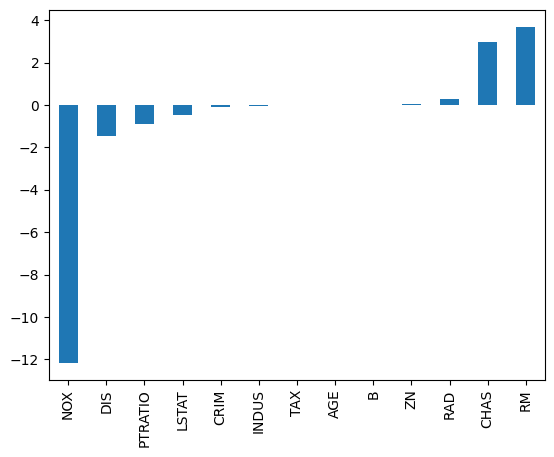

In [24]:
   
"""
2. 엘라스틱 넷(ElasticNet) 회귀를 구현하고, 
   학습용 데이터를 바탕으로 학습시킨 모델을 
   반환하는 함수를 완성합니다.
   
   Step01. 사이킷런에 구현되어 있는 
           엘라스틱 넷(ElasticNet) 회귀 모델을 불러옵니다.
           
           파라미터 alpha와 l1_ratio를 자유롭게 설정합니다.
   
   Step02. 불러온 모델을 학습용 데이터에 맞춰 학습시킵니다.
"""

def ElasticNet_regression(train_X, train_y):
    
    ElasticNet_reg = ElasticNet(alpha = 0.001 , l1_ratio= 0.001)
    
    ElasticNet_reg.fit(train_X,train_y)
    
    return ElasticNet_reg
    
    
# 각 변수의 beta_i 크기를 시각화하는 함수입니다.
def plot_graph(coef):
    coef.plot(kind='bar')
    
    
def main():
    
    X,y,feature_names = load_data()
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2, random_state=100)
    
    elasticnet_reg = ElasticNet_regression(train_X, train_y)
    
    # 엘라스틱넷 회귀 모델 평가 점수 출력하기
    score = elasticnet_reg.score(test_X,test_y)
    print("ElasticNet 회귀의 평가 점수:", score)
    
    # 엘라스틱넷 회귀의 beta_i의 크기를 저장합니다.
    ElasticNet_coef = pd.Series(elasticnet_reg.coef_, feature_names).sort_values()
    print("\nElasticNet 회귀의 beta_i\n", ElasticNet_coef)
    
    plot_graph(ElasticNet_coef)
    
    return elasticnet_reg

if __name__=="__main__":
    main()